# Homework 3

## ASTR 5900, Fall 2020, University of Oklahoma

### MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 (the only problem)

Consider a 2D lattice of size $L \times L$.  In this model, we want to randomly assign a value of 0 or 1 to each of the lattice sites in such a way that no two adjacent vertices both take the value of 1 (two lattice sites are adjacent if they share an edge).  A configuration that meets this condition is known as *feasible*.  For now we will pick random configurations such that each feasible configuration has an equal probability, while infeasible configurations have a probability of precisely 0.  One might ask,what is the expected number of 1's in our grid?  That is: 

$$ E \left[ n(X)\right]  = \sum_{\xi} n(\xi) P(\xi)$$
where $\xi$ is a possible configuration.  This is a similar problem to one we do in condensed matter physics, where we try to get a fair sample of interacting spins on a lattice.

Write your own MCMC algorithm from scratch to evaluate this expectation value for a grid of length 8.  You are limited to default python and the `numpy` package.  Parts of the algorithm are written already, but feel free to write your own versions.  I've also included a plotting function if you want to look at a configuration.

In order to use an MCMC algorithm for this model, you must use a Markov chain whose state space is the set of all feasible configurations.  In order to have a stationary distribution, the Markov chain must be aperiodic and irreducible.  Such a Markov chain can be constructed by the following process.

1. Start in a feasible configuration.

2. For each integer time $t+1$:

    1. Pick a vertex at random, uniformly 
    2. Toss a fair coin 
    3. If the coin is heads and all neighbors of the vertex is 0, set the vertex to 1. Set the vertex to 0 otherwise.
    
From your trajectory through state space, estimate that expectation value.  Finally, briefly discuss why we must use MCMC for this problem.  Be specific about why we can't sample the state space exactly.

### Answer:

Below I made the code as you specified, so not much to talk about. I created the PDF directly from the output of the MCMC with $10^4$ simulations, and using that found the expectation value after a burn-in of 5000, which turns out to be usually about 15.5 (varies between runs). I made plots of the number of 1s ($n$) as a function of simulation, as well as a plot of the post-burn-in PDF below.

We must use MCMC because we don't know the state PDF, and in finding it, there are too many possible combinations involved (even for just an 8x8 grid), making the calculation difficult. To be specific, there are $2^{64}$ different states that the configuration may be in, and out of these, it is difficult to have a mathematical way of determining feasibility of the configuration, so we would have to check feasibility with programming. To do this would require a lot of memory, and even a vectorized method would take a long time to determine their feasibilty.

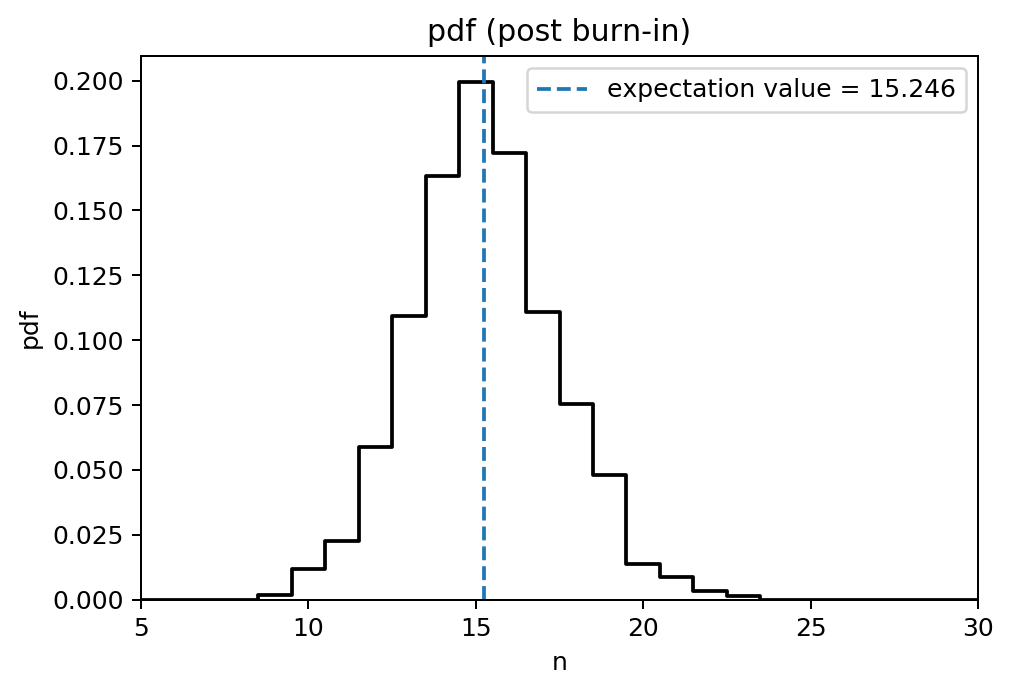

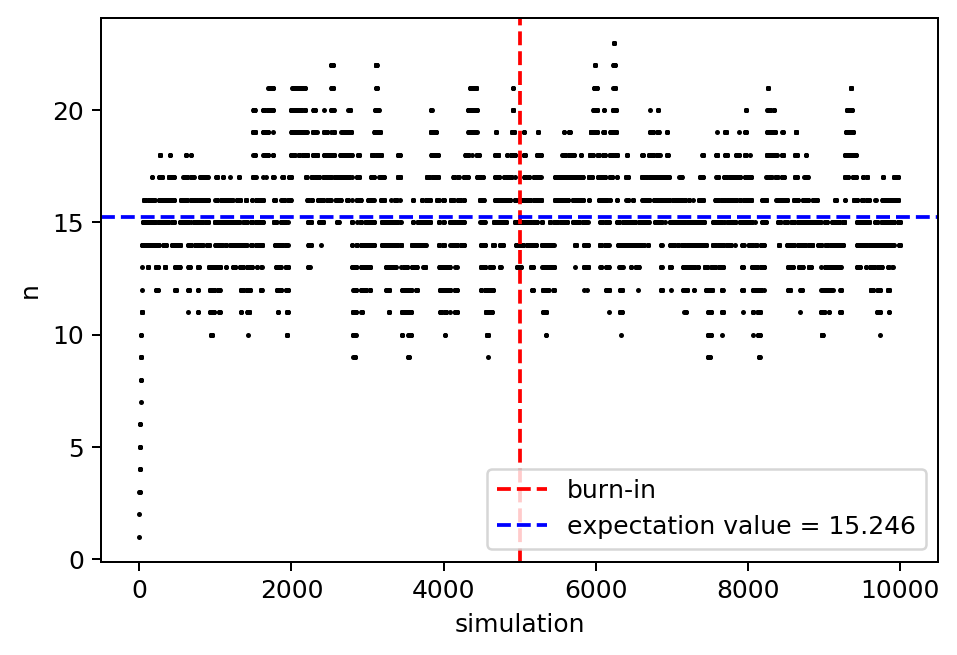

In [2]:
size = 8        # length of square volume
prob = 0.5      # coin flip probability
n_sim = 10000   # number of simulations


def init_state():
    """Return a feasible configuration as the initial configuration
    in the Markov chain.  For now this is the `blank` state."""
    return np.zeros((size, size), dtype=int)


def neighbors(state, index):
    """
    Determine if the site at vertex v of the lattice state can be turned to 1.
    Return True if site at v can be turned on.  Otherwise return False.
    
    Parameters
    ----------
    state (2d array) : The 2d ndarray of the lattice.
    
    vertex (2-tuple) : the coordinates of the site tested for flip to 1.
    """
    row, col = index
    
    # check vertical neighbors
    if row > 0:
        # look at top neighbor
        if state[row - 1, col]:
            return False
    if row < size - 1:
        # look at bottom neighbor
        if state[row + 1, col]:
            return False
            
    # check horizontal neighbors
    if col > 0:
        # look at left neighbor
        if state[row, col - 1]:
            return False
    if col < size - 1:
        # look at right neighbor
        if state[row, col + 1]:
            return False
            
    return True

    
def main():
    """
    The guts of the program that performs Monte Carlo for n_sim time steps.
    """
    state = init_state()
    
    counts = []
    for t in range(n_sim):
        ind = np.random.randint(0, size, 2)
        ind = tuple(ind)
        
        if np.random.rand() < prob and neighbors(state, ind):
            state[ind] = 1
        else:
            state[ind] = 0
        
        counts.append(state.sum())
    counts = np.array(counts)
    
    # calculate expectation value after burn-in
    burnin = int(n_sim / 2)
    burnin_n_sim = n_sim - burnin
    burnin_counts = counts[burnin:]

    possible_n = np.arange(size**2 + 1)
    pdf = np.array([(burnin_counts == i).sum() for i in possible_n]) / burnin_n_sim

    ev = (possible_n * pdf).sum()
    
    # plot the pdf
    fig, ax = plt.subplots(dpi=180)
    
    ax.plot(possible_n, pdf, color='k', drawstyle='steps-mid')
    ax.axvline(ev, ls='--', label=f'expectation value = {ev:.3f}')
    ax.set_xlim(5, 30)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('n')
    ax.set_ylabel('pdf')
    ax.set_title('pdf (post burn-in)')
    
    ax.legend()
    
    plt.show()
    
    # plot n versus simulation
    fig, ax = plt.subplots(dpi=180)
    
    ax.plot(np.arange(1, n_sim + 1), counts, 'o', c='k', ms=1)
    ax.axvline(n_sim / 2, ls='--', color='r', label='burn-in')
    ax.axhline(ev, ls='--', color='b', label=f'expectation value = {ev:.3f}')
    ax.set_xlabel('simulation')
    ax.set_ylabel('n')
    
    ax.legend()
    
    plt.show()

main()

In [3]:
# def plot(state):
#     """Plot the input state"""

#     plt.axis([0, size, 0, size])
#     plt.xticks(np.arange(0,size+1), [])
#     plt.yticks(np.arange(0,size+1), [])
#     plt.tick_params(axis='both', top='off', which="both", bottom="off", right="off", left="off")
#     plt.grid(True, color='gray', linestyle='-', linewidth=1)
#     plt.imshow(state,cmap="Greys", interpolation='nearest', extent=[0,size,0,size])
#     plt.show()